In [47]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [48]:
TRIM_LENGTH = 60
stages = [0,1,2,3,4]

In [49]:
def get_sleep_stage_distribution(data_path, trim_length=TRIM_LENGTH):
    data = np.load(data_path, allow_pickle=True)
    stage_lists = data['y'].tolist()[trim_length:-trim_length]
    distribution = [stage_lists.count(stage) for stage in stages]
    distribution_dict = {stage: stage_lists.count(stage) for stage in stages}
    return distribution_dict


In [50]:
def plot_sleep_stage_percentage_aggregation():
    data_dir = os.path.join(os.getcwd(), 'data_converted')
    data_paths = glob.glob(data_dir + "/*.npz")
    distribution_dicts = [get_sleep_stage_distribution(data_path) for data_path in data_paths]
    distribution = [sum([distribution_dict.get(stage) for distribution_dict in distribution_dicts]) for stage in stages]
    
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(distribution, autopct=lambda pct: func(pct, distribution), textprops=dict(color="w"))
    ax.legend(wedges, stages,
            title="Sleep Stages",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title("Sleep Stage Percentage")
    plt.show()


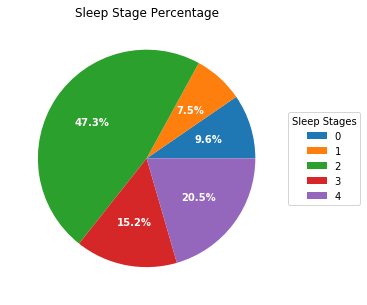

In [51]:
plot_sleep_stage_percentage_aggregation()

In [52]:
def plot_sleep_stage_percentage(data_file, trim_length=TRIM_LENGTH):
    data_dir = os.path.join(os.getcwd(), 'data_converted')
    data_path = os.path.join(data_dir, data_file)
    data = np.load(data_path, allow_pickle=True)

    stage_lists = data['y'].tolist()[trim_length:-trim_length]
    distribution = [stage_lists.count(stage) for stage in stages]

    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(distribution, autopct=lambda pct: func(pct, distribution), textprops=dict(color="w"))
    ax.legend(wedges, stages,
            title="Sleep Stages",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title("Sleep Stage Percentage")
    plt.show()

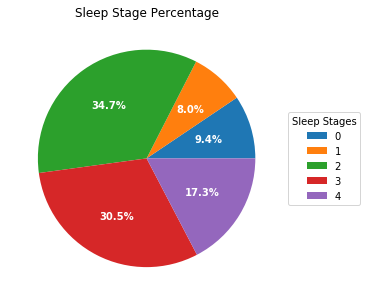

In [53]:
plot_sleep_stage_percentage('SC4001E0.npz')